In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns

In [77]:
df=pd.read_csv(r"C:\Users\Shubham\Desktop\Bondora_raw.csv",low_memory=False)

In [79]:
df.shape

(134529, 112)

In [80]:
df.info(verbose=True, null_counts=True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_2904\2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 112 columns):
 #    Column                                  Non-Null Count   Dtype  
---   ------                                  --------------   -----  
 0    ReportAsOfEOD                           134529 non-null  object 
 1    LoanId                                  134529 non-null  object 
 2    LoanNumber                              134529 non-null  int64  
 3    ListedOnUTC                             134529 non-null  object 
 4    BiddingStartedOn                        134529 non-null  object 
 5    BidsPortfolioManager                    134529 non-null  int64  
 6    BidsApi                                 134529 non-null  int64  
 7    BidsManual                              134529 non-null  float64
 8    UserName                                134529 non-null  object 
 9    NewCreditCustomer                       134529 non-null  bool   
 10   LoanApplicationStartedDate    

In [13]:
df.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [81]:
for i in df.columns:
    print(i,df[i].isnull().sum())

ReportAsOfEOD 0
LoanId 0
LoanNumber 0
ListedOnUTC 0
BiddingStartedOn 0
BidsPortfolioManager 0
BidsApi 0
BidsManual 0
UserName 0
NewCreditCustomer 0
LoanApplicationStartedDate 0
LoanDate 0
ContractEndDate 75546
FirstPaymentDate 0
MaturityDate_Original 0
MaturityDate_Last 0
ApplicationSignedHour 0
ApplicationSignedWeekday 0
VerificationType 45
LanguageCode 0
Age 0
DateOfBirth 0
Gender 45
Country 0
AppliedAmount 0
Amount 0
Interest 0
LoanDuration 0
MonthlyPayment 6685
County 36840
City 9794
UseOfLoan 0
Education 45
MaritalStatus 45
NrOfDependants 98929
EmploymentStatus 197
EmploymentDurationCurrentEmployer 876
EmploymentPosition 98439
WorkExperience 98007
OccupationArea 86
HomeOwnershipType 1652
IncomeFromPrincipalEmployer 0
IncomeFromPension 0
IncomeFromFamilyAllowance 0
IncomeFromSocialWelfare 0
IncomeFromLeavePay 0
IncomeFromChildSupport 0
IncomeOther 0
IncomeTotal 0
ExistingLiabilities 0
LiabilitiesTotal 0
RefinanceLiabilities 0
DebtToIncome 45
FreeCash 45
MonthlyPaymentDay 0
ActiveSc

In [82]:
list_of_50_percent_null

['EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'CreditScoreEsEquifaxRisk']

In [83]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


In [59]:
df.head

<bound method NDFrame.head of        ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0      

In [64]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

Percentage of Missing Values

In [65]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [66]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [67]:
percent_missing

ReportAsOfEOD                           0.000000
LoanId                                  0.000000
LoanNumber                              0.000000
ListedOnUTC                             0.000000
BiddingStartedOn                        0.000000
                                         ...    
NrOfScheduledPayments                  27.310840
ReScheduledOn                          70.027280
PrincipalDebtServicingCost             56.047395
InterestAndPenaltyDebtServicingCost    56.047395
ActiveLateLastPaymentCategory          61.160791
Length: 112, dtype: float64

Removing all the features which have more than 40% missing values

In [69]:
check = df.isnull().sum() / len(df) 

cols = check[check > 0.5].index
list(cols)

['ContractEndDate',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'DefaultDate',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [85]:
#drop column having missing value above 50%
data=df.drop(columns = ['ContractEndDate','NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory'])
print(data.info(verbose=True, null_counts=True))

C:\Users\Shubham\AppData\Local\Temp\ipykernel_2904\4005032054.py:34: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(data.info(verbose=True, null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 79 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ReportAsOfEOD                           134529 non-null  object 
 1   LoanId                                  134529 non-null  object 
 2   LoanNumber                              134529 non-null  int64  
 3   ListedOnUTC                             134529 non-null  object 
 4   BiddingStartedOn                        134529 non-null  object 
 5   BidsPortfolioManager                    134529 non-null  int64  
 6   BidsApi                                 134529 non-null  int64  
 7   BidsManual                              134529 non-null  float64
 8   UserName                                134529 non-null  object 
 9   NewCreditCustomer                       134529 non-null  bool   
 10  LoanApplicationStartedDate              1345

ReportAsOfEOD 0
LoanId 0
LoanNumber 0
ListedOnUTC 0
BiddingStartedOn 0
BidsPortfolioManager 0
BidsApi 0
BidsManual 0
UserName 0
NewCreditCustomer 0
LoanApplicationStartedDate 0
LoanDate 0
ContractEndDate 75546
FirstPaymentDate 0
MaturityDate_Original 0
MaturityDate_Last 0
ApplicationSignedHour 0
ApplicationSignedWeekday 0
VerificationType 45
LanguageCode 0
Age 0
DateOfBirth 0
Gender 45
Country 0
AppliedAmount 0
Amount 0
Interest 0
LoanDuration 0
MonthlyPayment 6685
County 36840
City 9794
UseOfLoan 0
Education 45
MaritalStatus 45
NrOfDependants 98929
EmploymentStatus 197
EmploymentDurationCurrentEmployer 876
EmploymentPosition 98439
WorkExperience 98007
OccupationArea 86
HomeOwnershipType 1652
IncomeFromPrincipalEmployer 0
IncomeFromPension 0
IncomeFromFamilyAllowance 0
IncomeFromSocialWelfare 0
IncomeFromLeavePay 0
IncomeFromChildSupport 0
IncomeOther 0
IncomeTotal 0
ExistingLiabilities 0
LiabilitiesTotal 0
RefinanceLiabilities 0
DebtToIncome 45
FreeCash 45
MonthlyPaymentDay 0
ActiveSc

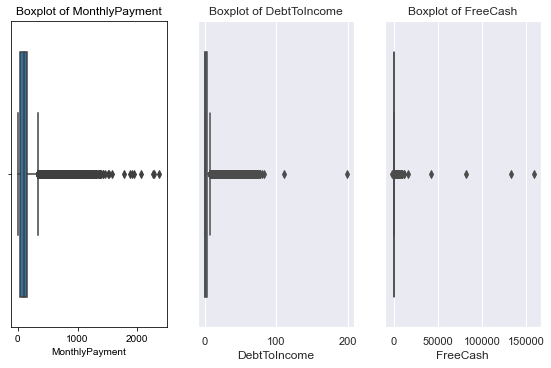

In [88]:
numerical_column=["MonthlyPayment","DebtToIncome","FreeCash"]
plt.figure(figsize=(100,80))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(12, 30, i)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

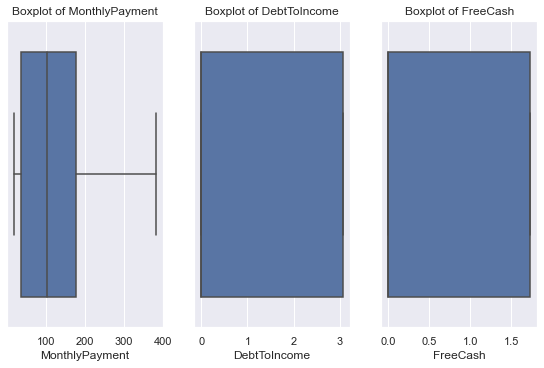

In [91]:
data["MonthlyPayment"]=winsorize(data["MonthlyPayment"],limits=(0.075,0.08))
data["DebtToIncome"]=winsorize(data["DebtToIncome"],limits=(0.05,0.25))
data["FreeCash"]=winsorize(data["FreeCash"],limits=(0.05,0.25))

numerical_column=["MonthlyPayment","DebtToIncome","FreeCash"]
plt.figure(figsize=(100,80))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(12, 30, i)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

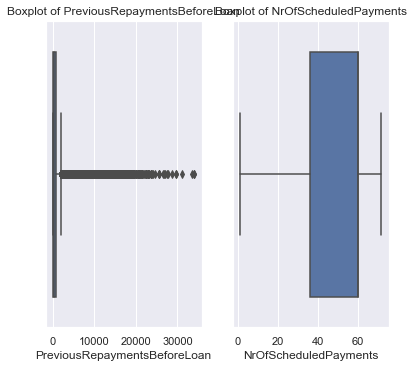

In [94]:
numerical_column=["PreviousRepaymentsBeforeLoan","NrOfScheduledPayments"]
plt.figure(figsize=(100,80))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(12, 30, i)
    sns.boxplot(data=df, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

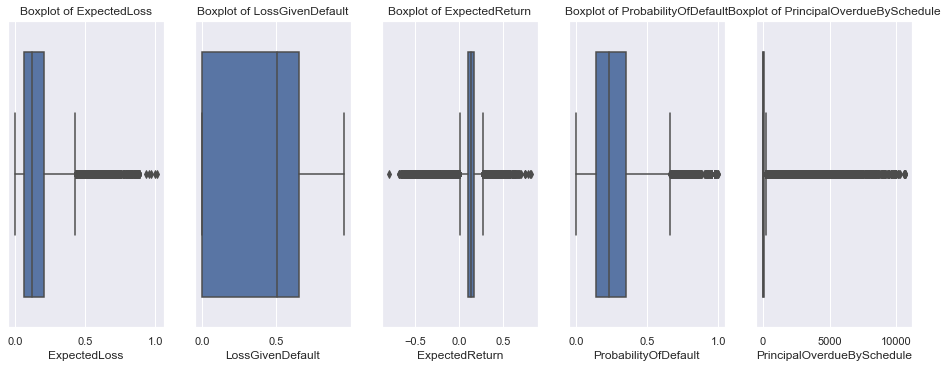

In [92]:
numerical_column=["ExpectedLoss","LossGivenDefault","ExpectedReturn","ProbabilityOfDefault","PrincipalOverdueBySchedule"]
plt.figure(figsize=(100,80))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(12, 30, i)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

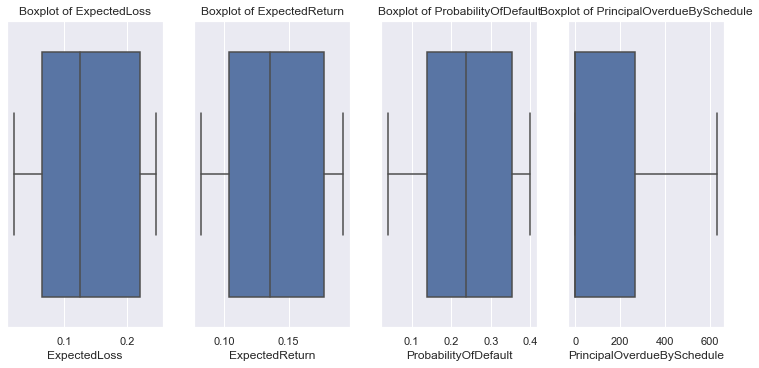

In [93]:

data["ExpectedLoss"]=winsorize(data["ExpectedLoss"],limits=(0.05,0.175))
data["ProbabilityOfDefault"]=winsorize(data["ProbabilityOfDefault"],limits=(0.05,0.175))
data["ExpectedReturn"]=winsorize(data["ExpectedReturn"],limits=(0.075,0.15))
data["PrincipalOverdueBySchedule"]=winsorize(data["PrincipalOverdueBySchedule"],limits=(0.05,0.2))

numerical_column=["ExpectedLoss","ExpectedReturn","ProbabilityOfDefault","PrincipalOverdueBySchedule"]
plt.figure(figsize=(100,80))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(12, 30, i)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

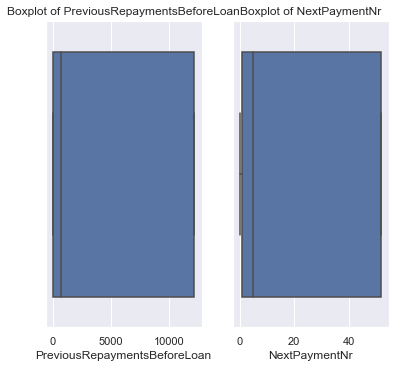

In [95]:
data["NextPaymentNr"]=winsorize(data["NextPaymentNr"],limits=(0.05,0.275))
data["PreviousRepaymentsBeforeLoan"]=winsorize(data["PreviousRepaymentsBeforeLoan"],limits=(0.05,0.325))

numerical_column= ["PreviousRepaymentsBeforeLoan","NextPaymentNr"]
plt.figure(figsize=(100,80))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(12, 30, i)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

In [96]:
# Identify categorical columns for encoding
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)

Index(['ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
       'UserName', 'LoanApplicationStartedDate', 'LoanDate',
       'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last',
       'DateOfBirth', 'Country', 'County', 'City',
       'EmploymentDurationCurrentEmployer', 'LastPaymentOn', 'DefaultDate',
       'StageActiveSince', 'Rating', 'Status', 'WorseLateCategory',
       'CreditScoreEsMicroL'],
      dtype='object')


In [97]:
#convert numerical to categorical
data[['VerificationType','EmploymentStatus','Education','ActiveScheduleFirstPaymentReached','Restructured'
      ,'NextPaymentNr','NewCreditCustomer','Gender','MaritalStatus','OccupationArea','HomeOwnershipType',
      'RecoveryStage', 'ModelVersion','CreditScoreEeMini','PlannedInterestTillDate']] = data[['VerificationType','EmploymentStatus','Education','ActiveScheduleFirstPaymentReached','Restructured'
      ,'NextPaymentNr','NewCreditCustomer','Gender','MaritalStatus','OccupationArea','HomeOwnershipType',
      'RecoveryStage', 'ModelVersion','CreditScoreEeMini','PlannedInterestTillDate']].astype(object)

In [98]:
# Identify categorical columns for encoding
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)

Index(['ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'VerificationType', 'DateOfBirth', 'Gender',
       'Country', 'County', 'City', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'DefaultDate', 'RecoveryStage', 'StageActiveSince',
       'ModelVersion', 'Rating', 'Status', 'Restructured', 'WorseLateCategory',
       'CreditScoreEsMicroL', 'CreditScoreEeMini', 'NextPaymentNr'],
      dtype='object')


In [99]:
data.info(verbose=True, null_counts=True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_2904\2802456010.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 79 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ReportAsOfEOD                           134529 non-null  object 
 1   LoanId                                  134529 non-null  object 
 2   LoanNumber                              134529 non-null  int64  
 3   ListedOnUTC                             134529 non-null  object 
 4   BiddingStartedOn                        134529 non-null  object 
 5   BidsPortfolioManager                    134529 non-null  int64  
 6   BidsApi                                 134529 non-null  int64  
 7   BidsManual                              134529 non-null  float64
 8   UserName                                134529 non-null  object 
 9   NewCreditCustomer                       134529 non-null  object 
 10  LoanApplicationStartedDate              1345

In [100]:
#filling categorical missing values

data['County'] = data['County'].fillna(data['County'].dropna().mode().values[0])
data['City'] = data['City'].fillna(data['City'].dropna().mode().values[0])
data['EmploymentDurationCurrentEmployer'] = data['EmploymentDurationCurrentEmployer'].fillna(data['EmploymentDurationCurrentEmployer'].dropna().mode().values[0])
data['LastPaymentOn'] = data['LastPaymentOn'].fillna(data['LastPaymentOn'].dropna().mode().values[0])
data['DefaultDate'] = data['DefaultDate'].fillna(data['DefaultDate'].dropna().mode().values[0])
data['StageActiveSince'] = data['StageActiveSince'].fillna(data['StageActiveSince'].dropna().mode().values[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].dropna().mode().values[0])
data['WorseLateCategory'] = data['WorseLateCategory'].fillna(data['WorseLateCategory'].dropna().mode().values[0])
data['CreditScoreEsMicroL'] = data['CreditScoreEsMicroL'].fillna(data['CreditScoreEsMicroL'].dropna().mode().values[0])
data['VerificationType'] = data['VerificationType'].fillna(data['VerificationType'].dropna().mode().values[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].dropna().mode().values[0])
data['EmploymentStatus'] = data['EmploymentStatus'].fillna(data['EmploymentStatus'].dropna().mode().values[0])
data['RecoveryStage'] = data['RecoveryStage'].fillna(data['RecoveryStage'].dropna().mode().values[0])
data['ModelVersion'] = data['ModelVersion'].fillna(data['ModelVersion'].dropna().mode().values[0])
data['CreditScoreEeMini'] = data['CreditScoreEeMini'].fillna(data['CreditScoreEeMini'].dropna().mode().values[0])
data['Education'] = data['Education'].fillna(data['Education'].dropna().mode().values[0])
data['MaritalStatus'] = data['MaritalStatus'].fillna(data['MaritalStatus'].dropna().mode().values[0])
data['OccupationArea'] = data['OccupationArea'].fillna(data['OccupationArea'].dropna().mode().values[0])
data['HomeOwnershipType'] = data['HomeOwnershipType'].fillna(data['HomeOwnershipType'].dropna().mode().values[0])
data['PlannedInterestTillDate'] = data['PlannedInterestTillDate'].fillna(data['PlannedInterestTillDate'].dropna().mode().values[0])


In [101]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[float, int]).columns
print(numerical_columns)

Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'RecoveryStage', 'ModelVersion', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       '

In [102]:
#filling numerical missing values
data['LossGivenDefault'] = data['LossGivenDefault'].fillna(data['LossGivenDefault'].dropna().mean())
data['NrOfScheduledPayments'] = data['NrOfScheduledPayments'].fillna(data['NrOfScheduledPayments'].dropna().mean())

In [103]:
data.info(verbose=True, null_counts=True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_2904\2802456010.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 79 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ReportAsOfEOD                           134529 non-null  object 
 1   LoanId                                  134529 non-null  object 
 2   LoanNumber                              134529 non-null  int64  
 3   ListedOnUTC                             134529 non-null  object 
 4   BiddingStartedOn                        134529 non-null  object 
 5   BidsPortfolioManager                    134529 non-null  int64  
 6   BidsApi                                 134529 non-null  int64  
 7   BidsManual                              134529 non-null  float64
 8   UserName                                134529 non-null  object 
 9   NewCreditCustomer                       134529 non-null  object 
 10  LoanApplicationStartedDate              1345

In [104]:
data.isnull().sum()

ReportAsOfEOD                             0
LoanId                                    0
LoanNumber                                0
ListedOnUTC                               0
BiddingStartedOn                          0
                                         ..
AmountOfPreviousLoansBeforeLoan           0
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
NextPaymentNr                             0
NrOfScheduledPayments                     0
Length: 79, dtype: int64

In [105]:
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)

Index(['ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'DateOfBirth', 'Country', 'County', 'City',
       'EmploymentDurationCurrentEmployer',
       'ActiveScheduleFirstPaymentReached', 'LastPaymentOn', 'DefaultDate',
       'StageActiveSince', 'Rating', 'Status', 'Restructured',
       'WorseLateCategory', 'CreditScoreEsMicroL', 'NextPaymentNr'],
      dtype='object')


In [106]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

#numeric df
BM_num = data[num]
#categoric df
BM_cat = data[cat]

#print(num)
#print(cat)

[data[category].value_counts() for category in cat[1:]]

[F0660C80-83F3-4A97-8DA0-9C250112D6EC    1
 D9896ECC-6F4F-4CA3-9C0A-A39B00943E3C    1
 D70B97B5-2055-44DB-BC30-A39B0107752C    1
 CE2263B0-C648-4649-BAAB-A39600D8D5A6    1
 3F8E8CF8-0549-494E-BF6F-A38E00D84EEF    1
                                        ..
 46549582-46CE-432A-9792-A8B300AA7130    1
 A85B5874-E035-42C4-9E62-A8B300A9C614    1
 3D00C301-C313-47E4-9131-A8B300783DEF    1
 E518117C-505C-446E-8304-A8B2017F908A    1
 3A0DEBF3-292C-4EB4-B71A-A4170157749D    1
 Name: LoanId, Length: 134529, dtype: int64,
 2017-04-20 09:54:00    4
 2018-02-13 10:27:17    3
 2017-04-20 09:49:42    3
 2018-06-18 06:36:42    3
 2018-04-26 14:44:26    3
                       ..
 2018-03-29 05:19:17    1
 2018-03-29 00:40:21    1
 2018-03-28 23:38:02    1
 2018-03-28 23:22:06    1
 2015-01-06 11:07:06    1
 Name: ListedOnUTC, Length: 134130, dtype: int64,
 2017-04-20 12:54:00    4
 2019-11-11 19:11:43    3
 2018-10-15 15:31:15    3
 2014-06-30 22:58:16    3
 2018-02-13 12:54:38    3
                

In [107]:
data['Gender'].replace(['E'],[2.0],inplace = True)
data['Education'].replace([-1.0],[1.0],inplace = True)
data['MaritalStatus'].replace([-1.0],[1.0],inplace = True)
data['OccupationArea'].replace([-1.0],[1.0],inplace = True)
data['HomeOwnershipType'].replace([-1.0],[1.0],inplace = True)

In [108]:
data.Gender.value_counts()

0.0    85695
1.0    38213
2.0    10621
Name: Gender, dtype: int64

In [109]:
data.Education.value_counts()

4.0    51375
5.0    35398
3.0    29260
1.0    12061
2.0     6427
0.0        8
Name: Education, dtype: int64

In [110]:
data.MaritalStatus.value_counts()

1.0    108743
3.0     12400
2.0      9400
4.0      3377
5.0       601
0.0         8
Name: MaritalStatus, dtype: int64

In [111]:
data.OccupationArea.value_counts()

1.0     106504
7.0       3587
6.0       3312
3.0       3198
8.0       2462
17.0      2424
9.0       2262
10.0      1933
15.0      1684
16.0      1430
11.0      1148
19.0      1000
14.0       843
18.0       619
4.0        587
13.0       564
12.0       477
5.0        362
2.0        122
0.0         11
Name: OccupationArea, dtype: int64

In [112]:
data.HomeOwnershipType.value_counts()

1.0     48989
3.0     29579
2.0     20780
8.0     15457
10.0     7956
4.0      4582
7.0      3337
6.0      1618
5.0      1442
9.0       743
0.0        46
Name: HomeOwnershipType, dtype: int64

In [113]:
data_new2 = data.copy()                                     
data_new2 = data_new2.astype({'NewCreditCustomer': int, 'Restructured': int})        
print(data_new2)    

       ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2009-06-11 16:40:39  2009-06-

# Exploratory Data Analysis

In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNumber,134529.0,944939.218711,478673.842616,37.000000,620679.000000,923597.000000,1.311025e+06,1.855339e+06
BidsPortfolioManager,134529.0,966.452876,1355.686016,0.000000,155.000000,465.000000,1.218000e+03,1.062500e+04
BidsApi,134529.0,29.111664,150.159148,0.000000,0.000000,0.000000,5.000000e+00,7.570000e+03
BidsManual,134529.0,559.332590,750.360512,0.000000,96.000000,317.000000,7.290000e+02,1.063000e+04
ApplicationSignedHour,134529.0,13.374640,4.992375,0.000000,10.000000,13.000000,1.700000e+01,2.300000e+01
ApplicationSignedWeekday,134529.0,3.907908,1.726192,1.000000,2.000000,4.000000,5.000000e+00,7.000000e+00
VerificationType,134529.0,2.817653,1.407839,0.000000,1.000000,4.000000,4.000000e+00,4.000000e+00
LanguageCode,134529.0,2.827874,1.959802,1.000000,1.000000,3.000000,4.000000e+00,2.200000e+01
Age,134529.0,40.819295,12.348693,0.000000,31.000000,40.000000,5.000000e+01,7.700000e+01
Gender,134529.0,0.441949,0.636028,0.000000,0.000000,0.000000,1.000000e+00,2.000000e+00


In [115]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ReportAsOfEOD,134529,1,2020-01-27,134529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanId,134529,134529,F0660C80-83F3-4A97-8DA0-9C250112D6EC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanNumber,134529.0,NaN,NaN,NaN,944939.218711,478673.842616,37.0,620679.0,923597.0,1311025.0,1855339.0
ListedOnUTC,134529,134130,2017-04-20 09:54:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BiddingStartedOn,134529,134135,2017-04-20 12:54:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
AmountOfPreviousLoansBeforeLoan,134529.0,NaN,NaN,NaN,2868.652401,4507.046575,0.0,0.0,396.3541,4250.0,53762.0
PreviousRepaymentsBeforeLoan,134529.0,NaN,NaN,NaN,4537.681642,5505.652129,0.0,54.79,711.24,12221.82,12221.82
PreviousEarlyRepaymentsCountBeforeLoan,134529.0,NaN,NaN,NaN,0.069903,0.359461,0.0,0.0,0.0,0.0,11.0
NextPaymentNr,134529.0,53.0,52.0,37016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)

Index(['ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'DateOfBirth', 'Country', 'County', 'City',
       'EmploymentDurationCurrentEmployer',
       'ActiveScheduleFirstPaymentReached', 'LastPaymentOn', 'DefaultDate',
       'StageActiveSince', 'Rating', 'Status', 'Restructured',
       'WorseLateCategory', 'CreditScoreEsMicroL', 'NextPaymentNr'],
      dtype='object')


In [117]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[float, int]).columns
print(numerical_columns)

Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'RecoveryStage', 'ModelVersion', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       '

LoanNumber
Skew : 0.05


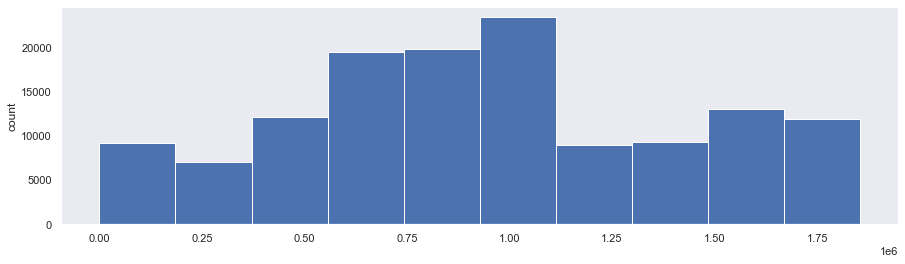

BidsPortfolioManager
Skew : 2.93


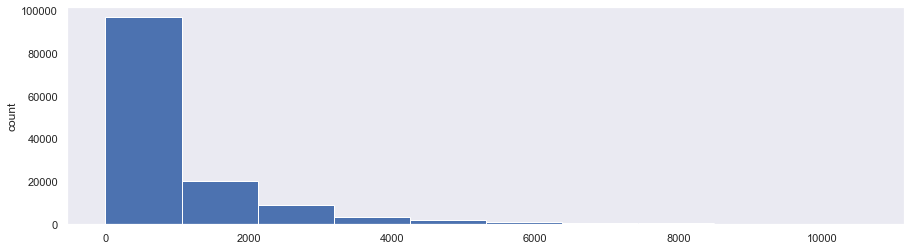

BidsApi
Skew : 13.58


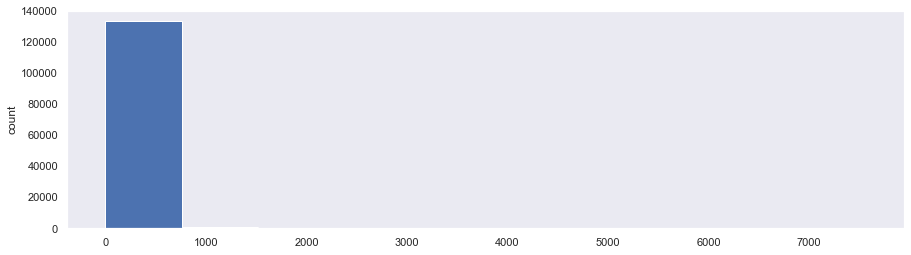

BidsManual
Skew : 3.29


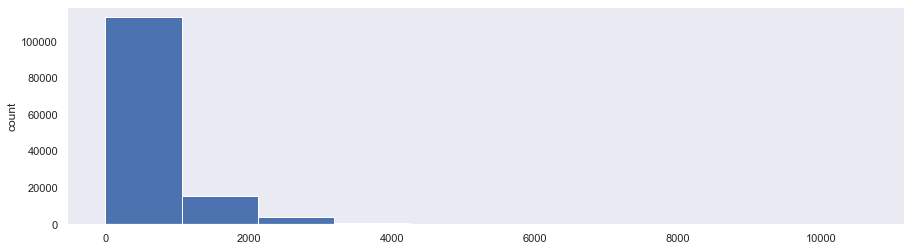

ApplicationSignedHour
Skew : -0.38


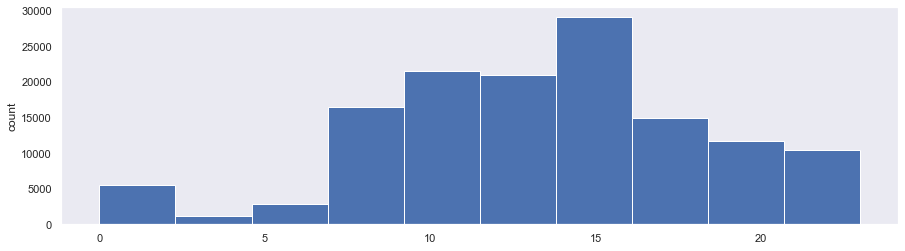

ApplicationSignedWeekday
Skew : 0.09


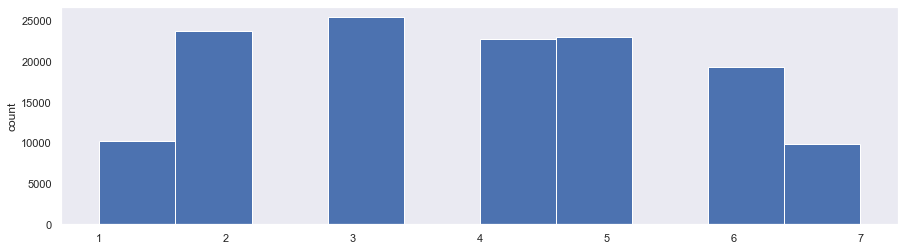

VerificationType
Skew : -0.45


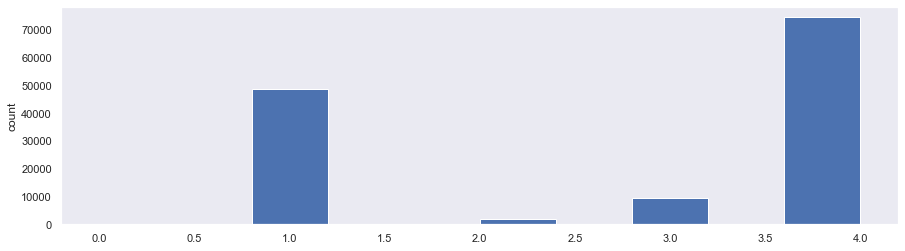

LanguageCode
Skew : 0.54


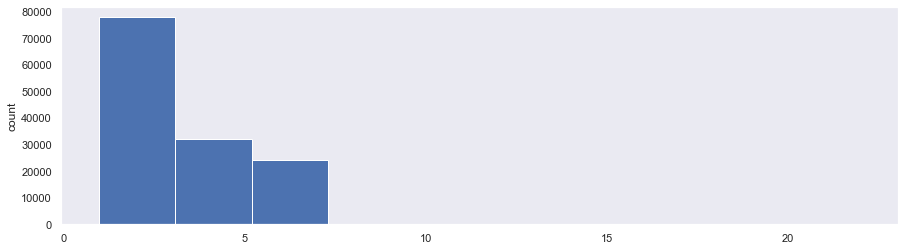

Age
Skew : 0.34


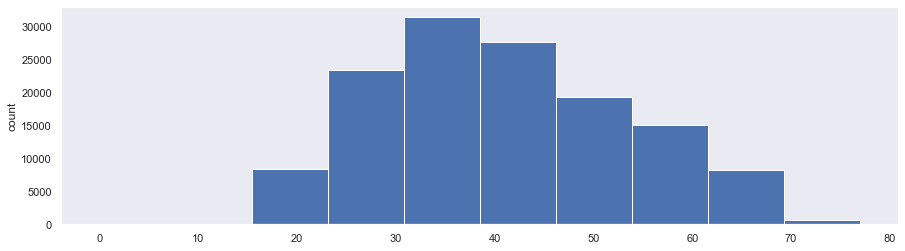

Gender
Skew : 1.14


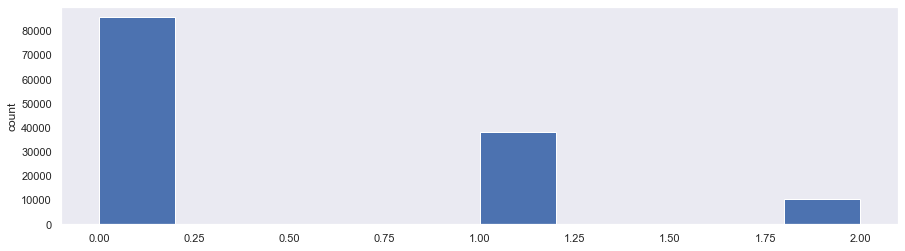

AppliedAmount
Skew : 1.52


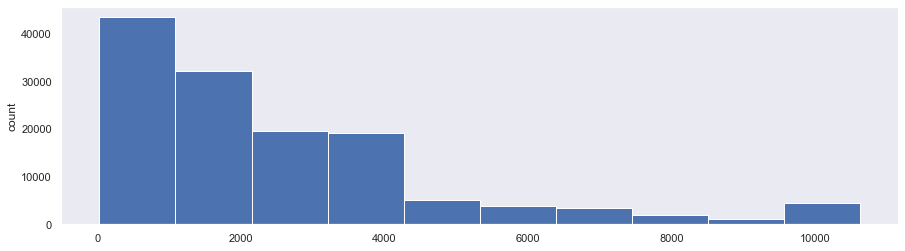

Amount
Skew : 1.61


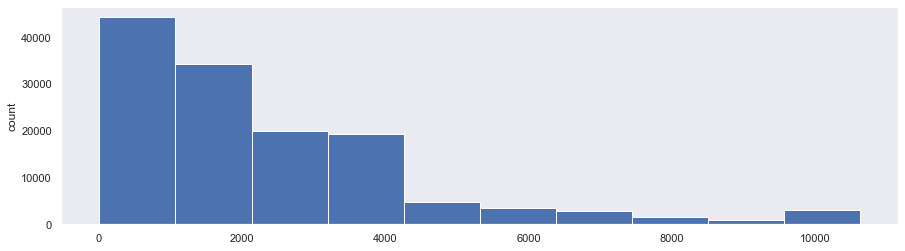

Interest
Skew : 3.41


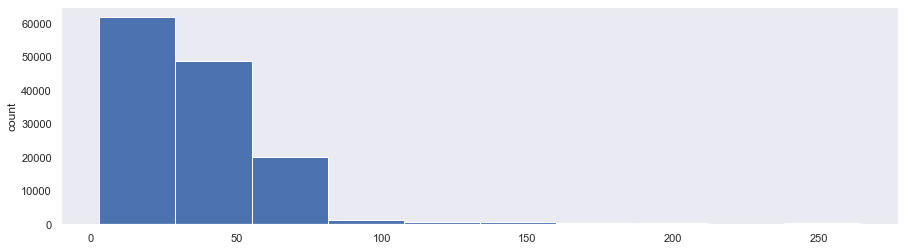

LoanDuration
Skew : -0.72


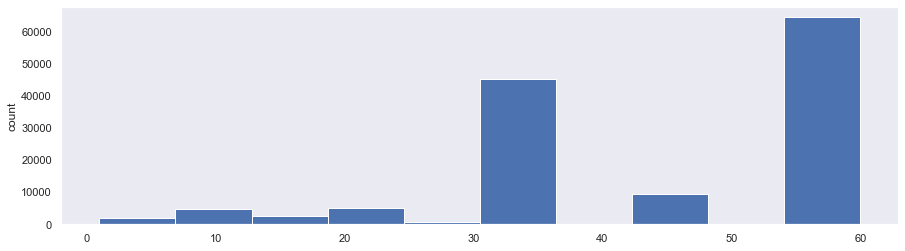

MonthlyPayment
Skew : 1.11


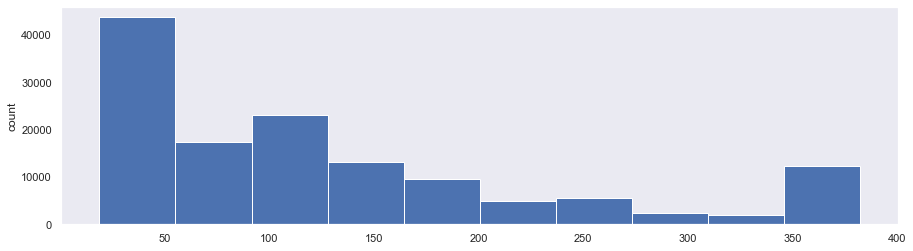

UseOfLoan
Skew : 13.36


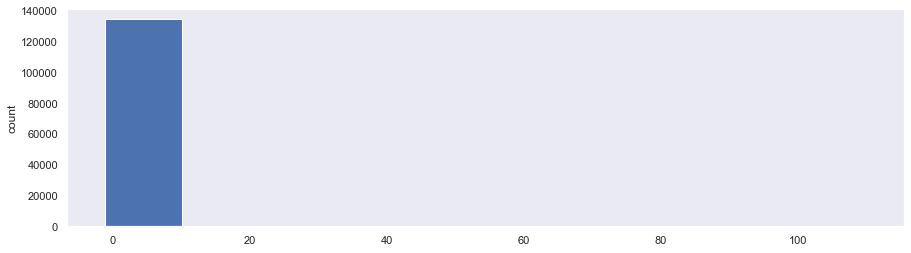

Education
Skew : -0.87


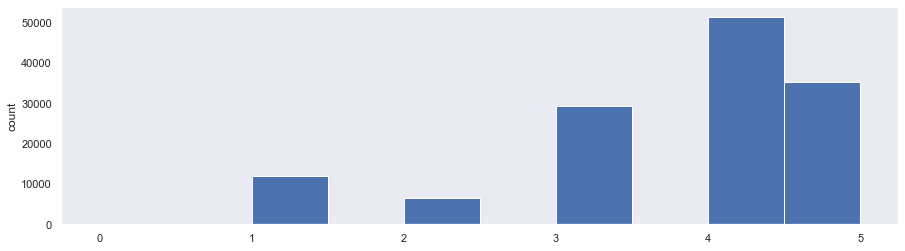

MaritalStatus
Skew : 2.25


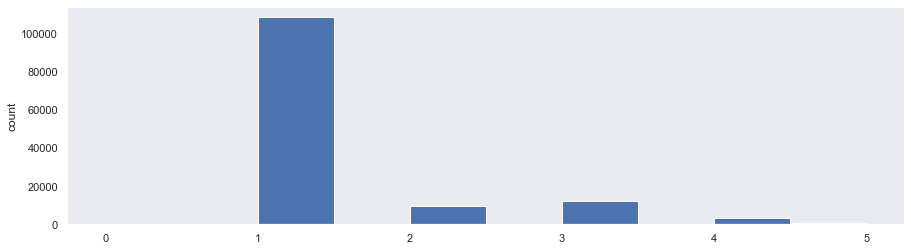

EmploymentStatus
Skew : 1.24


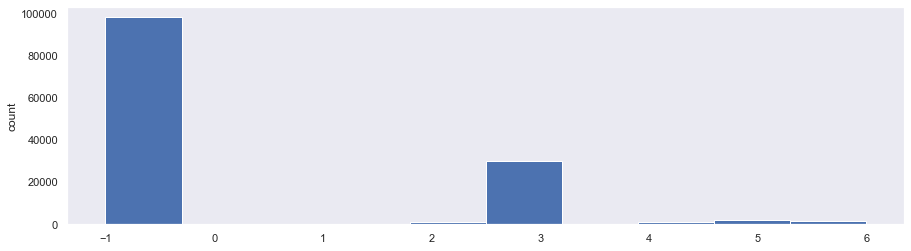

OccupationArea
Skew : 2.36


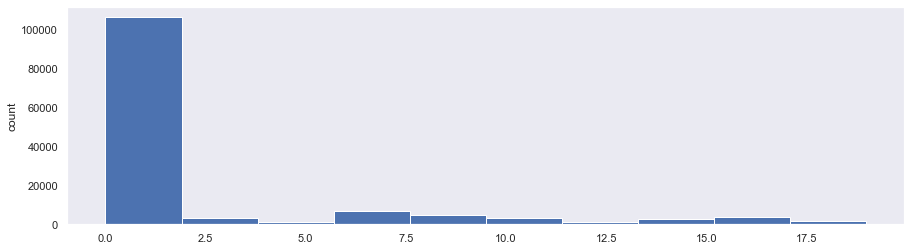

HomeOwnershipType
Skew : 1.17


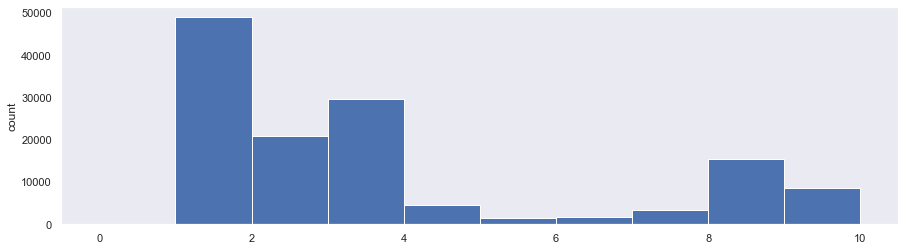

IncomeFromPrincipalEmployer
Skew : 37.3


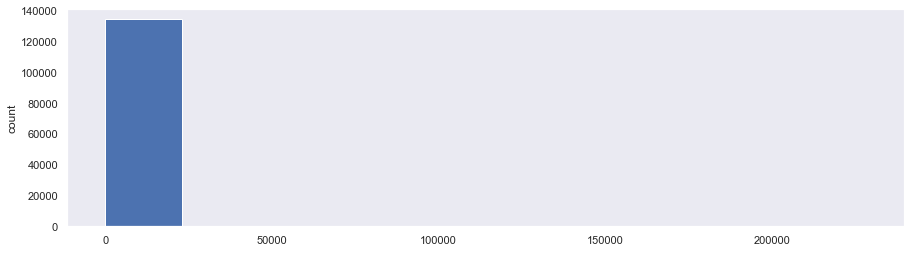

IncomeFromPension
Skew : 11.08


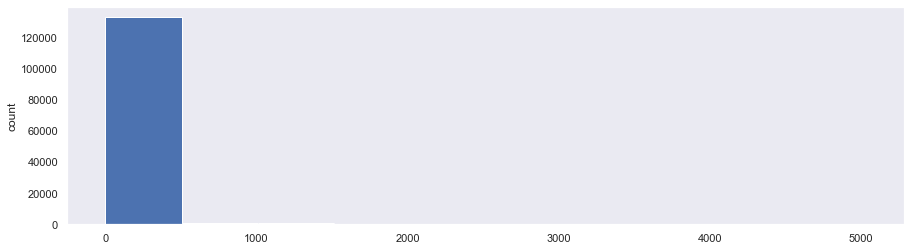

IncomeFromFamilyAllowance
Skew : 12.51


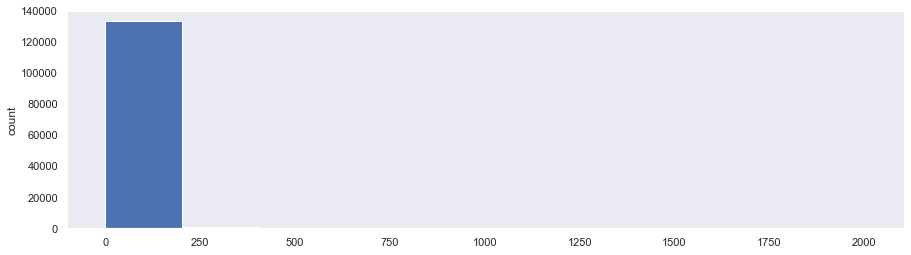

IncomeFromSocialWelfare
Skew : 39.99


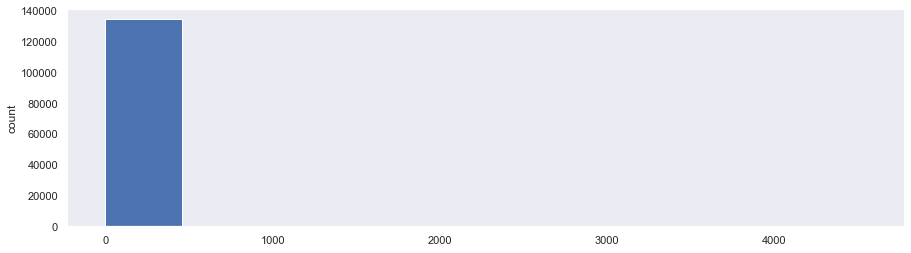

IncomeFromLeavePay
Skew : 160.61


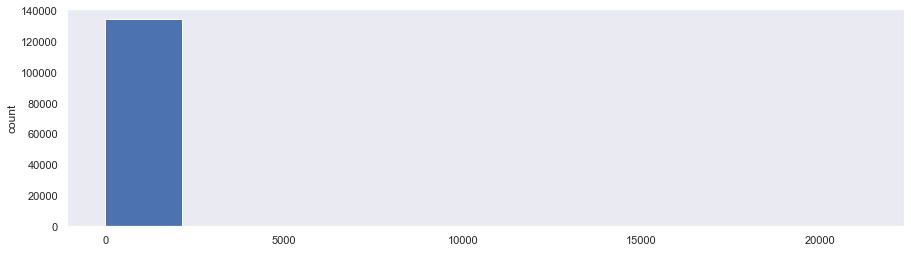

IncomeFromChildSupport
Skew : 20.06


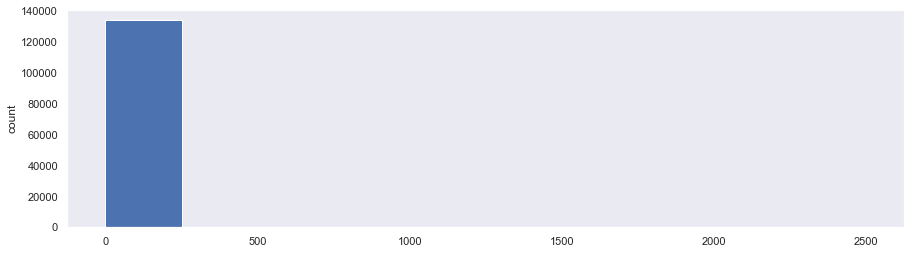

IncomeOther
Skew : 29.71


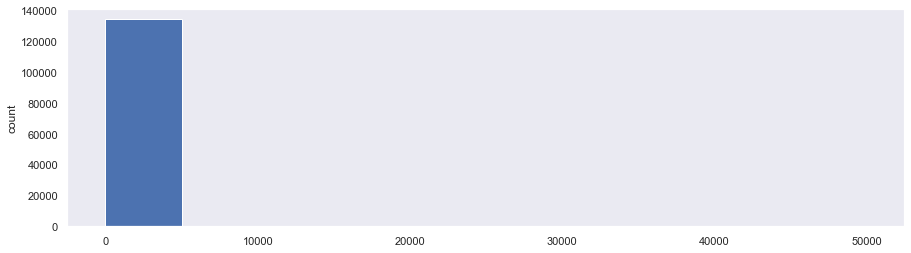

IncomeTotal
Skew : 132.16


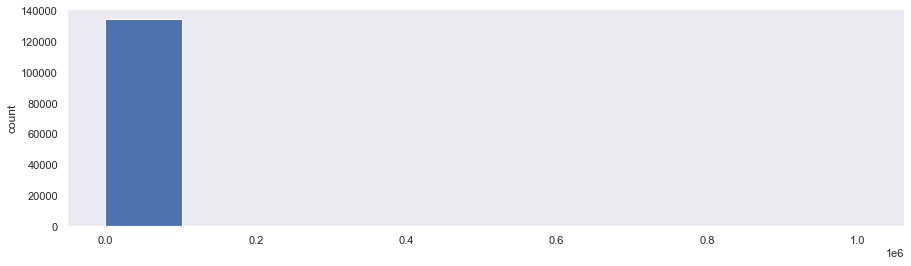

ExistingLiabilities
Skew : 2.01


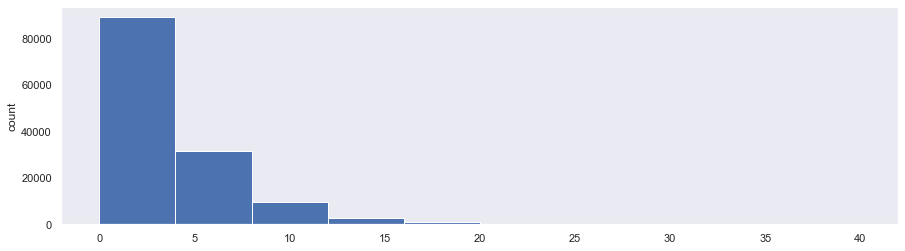

LiabilitiesTotal
Skew : 365.96


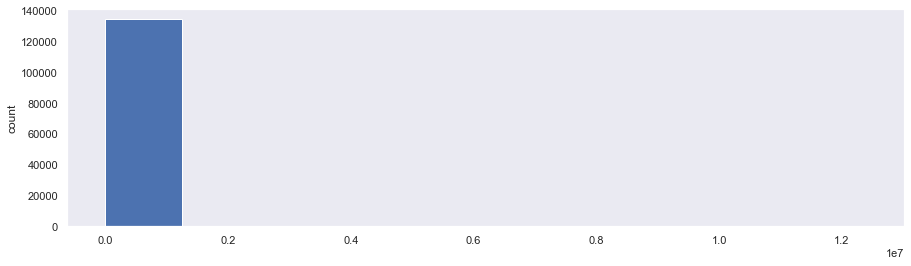

RefinanceLiabilities
Skew : 7.1


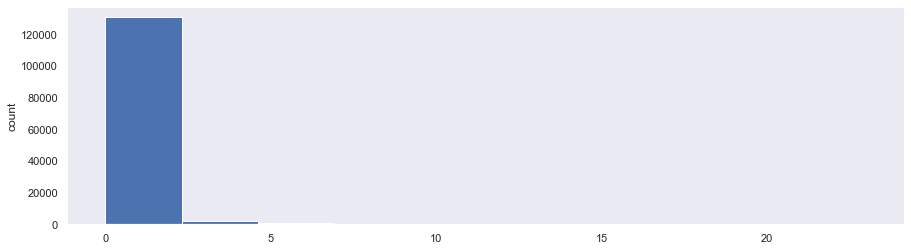

DebtToIncome
Skew : 1.13


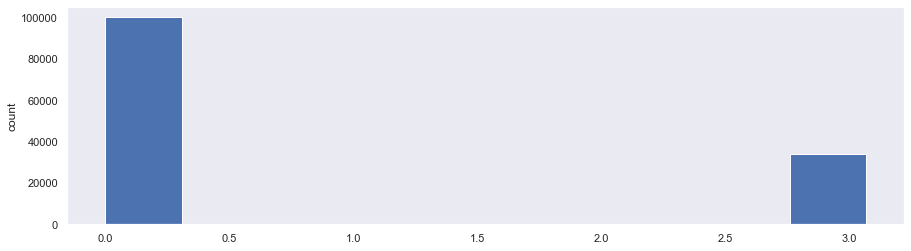

FreeCash
Skew : 1.14


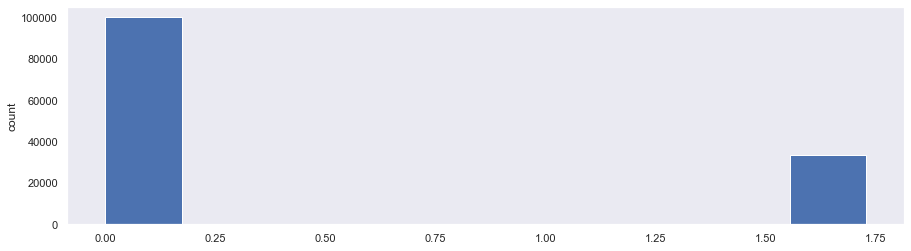

MonthlyPaymentDay
Skew : 0.41


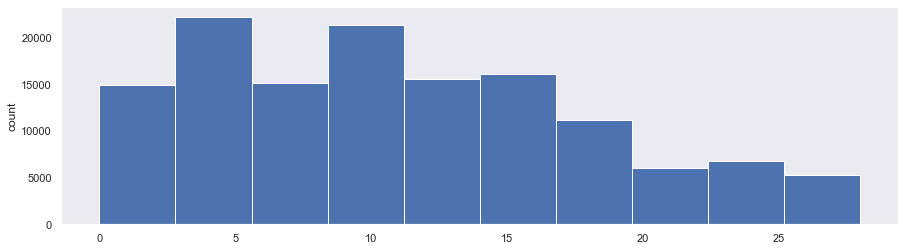

PlannedInterestTillDate
Skew : 3.69


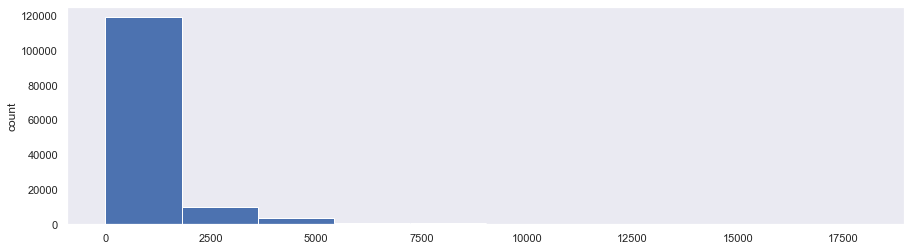

ExpectedLoss
Skew : 0.17


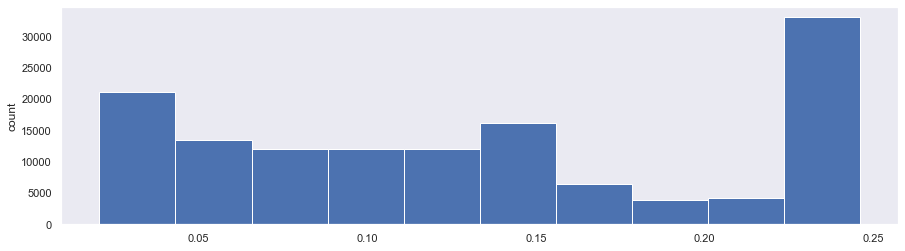

LossGivenDefault
Skew : -0.25


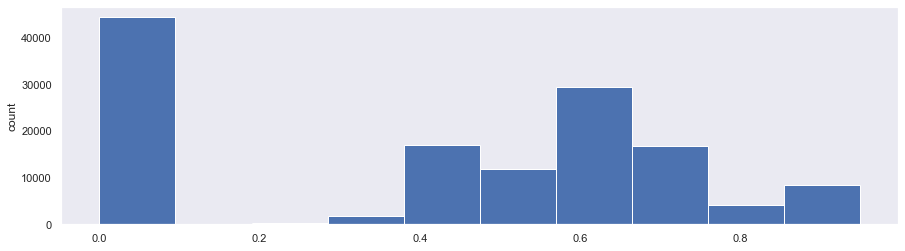

ExpectedReturn
Skew : 0.15


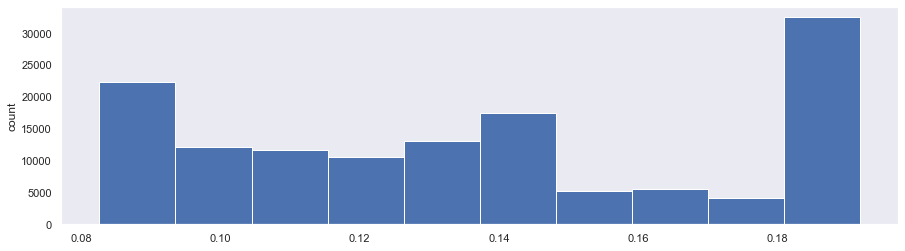

ProbabilityOfDefault
Skew : -0.08


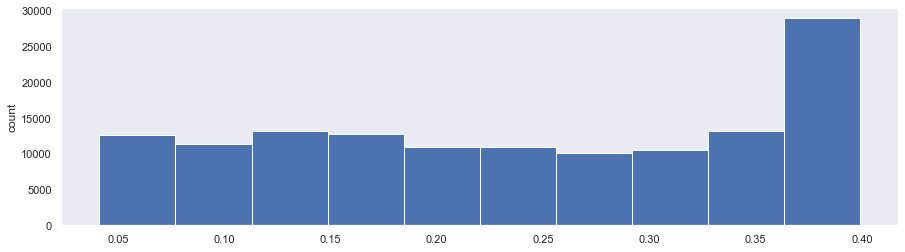

PrincipalOverdueBySchedule
Skew : 1.15


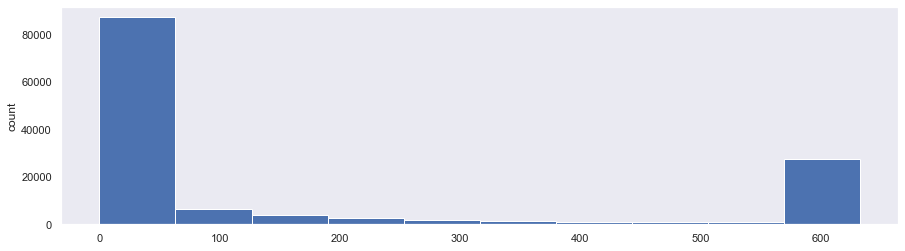

RecoveryStage
Skew : 1.03


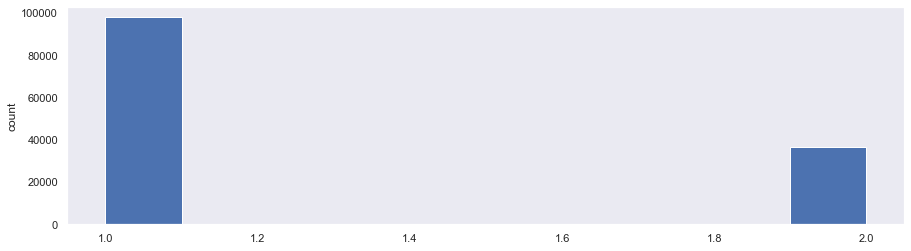

ModelVersion
Skew : -1.36


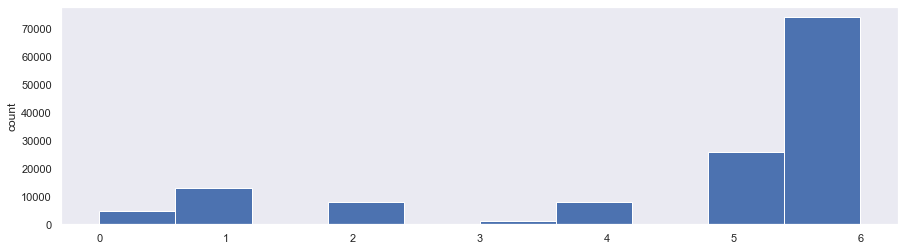

CreditScoreEeMini
Skew : -3.38


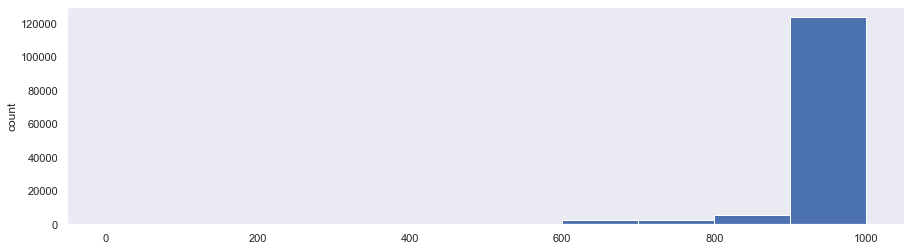

PrincipalPaymentsMade
Skew : 3.46


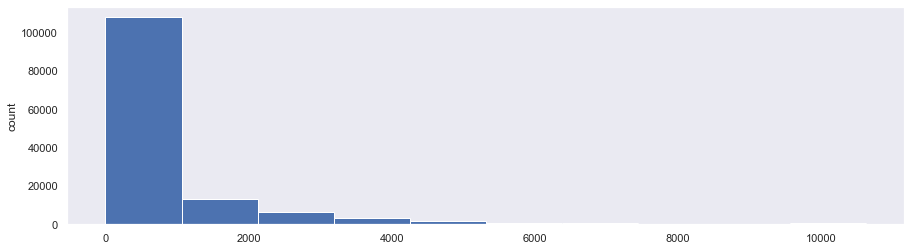

InterestAndPenaltyPaymentsMade
Skew : 4.15


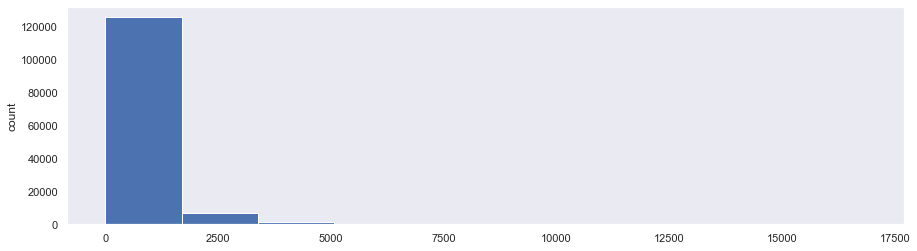

PrincipalBalance
Skew : 1.73


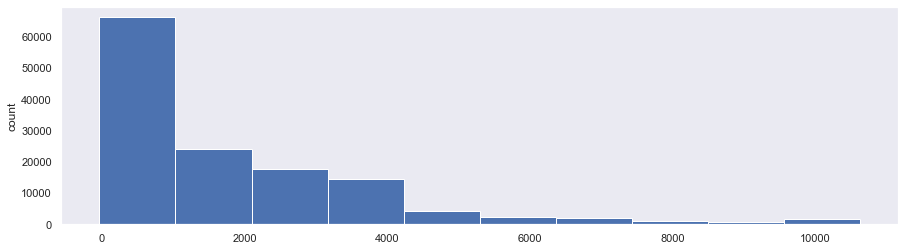

InterestAndPenaltyBalance
Skew : 8.52


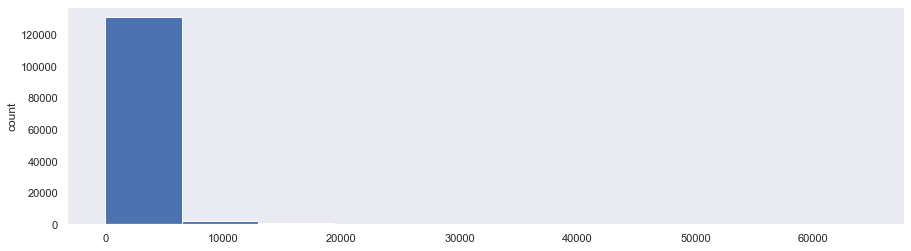

NoOfPreviousLoansBeforeLoan
Skew : 2.63


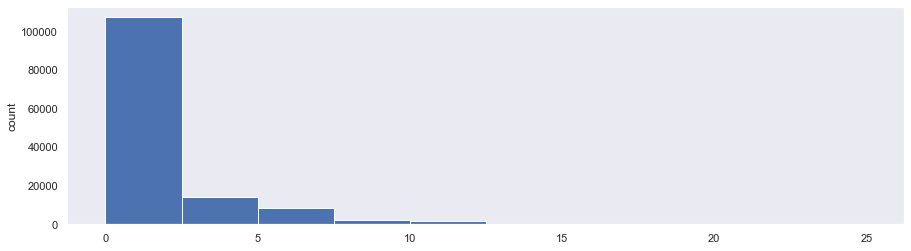

AmountOfPreviousLoansBeforeLoan
Skew : 2.19


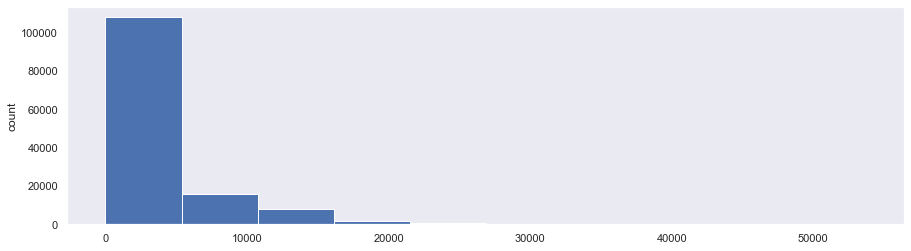

PreviousRepaymentsBeforeLoan
Skew : 0.62


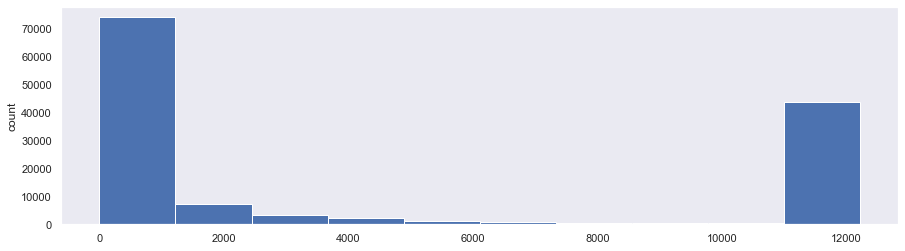

PreviousEarlyRepaymentsCountBeforeLoan
Skew : 8.5


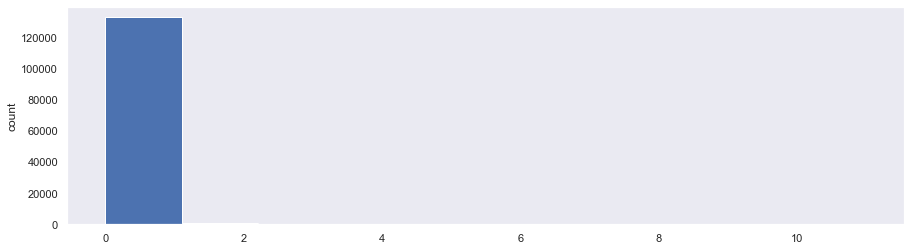

NrOfScheduledPayments
Skew : -1.1


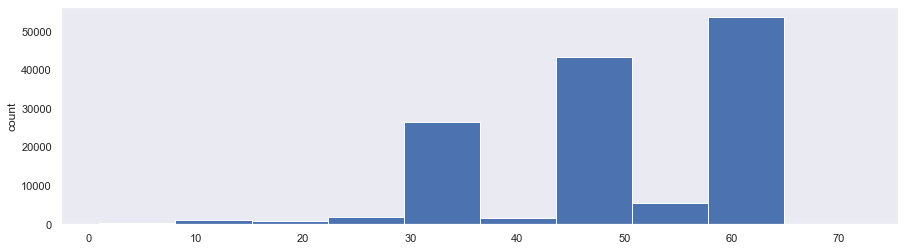

In [118]:
#histogram for numerical data
for col in numerical_columns:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.show()

In [119]:
#countplot of categorical variable

<AxesSubplot:xlabel='NewCreditCustomer', ylabel='count'>

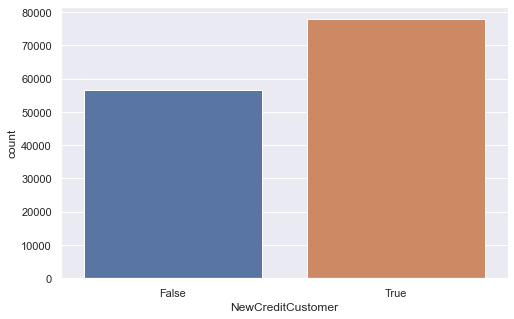

In [120]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='NewCreditCustomer')

<AxesSubplot:xlabel='Country', ylabel='count'>

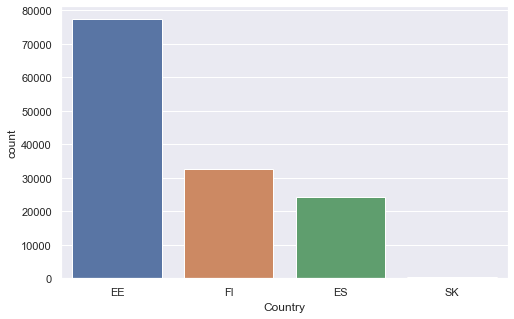

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Country')

<AxesSubplot:xlabel='EmploymentDurationCurrentEmployer', ylabel='count'>

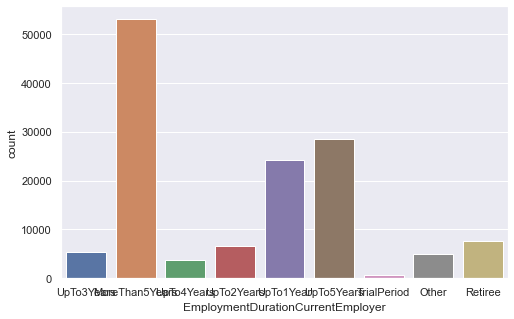

In [122]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='EmploymentDurationCurrentEmployer')

<AxesSubplot:xlabel='ActiveScheduleFirstPaymentReached', ylabel='count'>

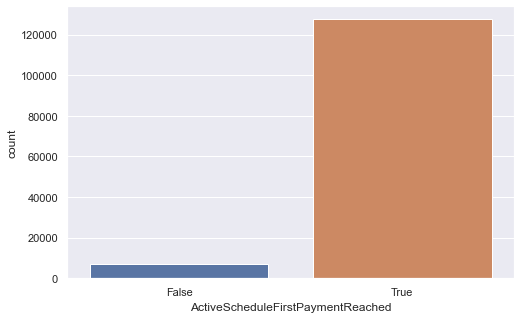

In [123]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='ActiveScheduleFirstPaymentReached')

<AxesSubplot:xlabel='Rating', ylabel='count'>

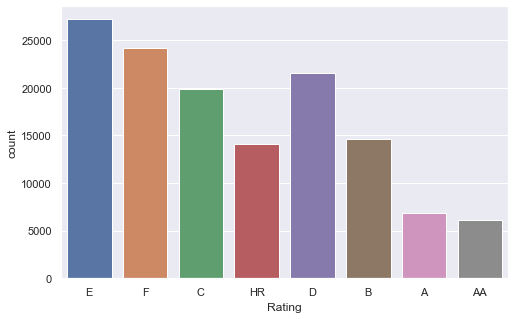

In [124]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Rating')

<AxesSubplot:xlabel='Status', ylabel='count'>

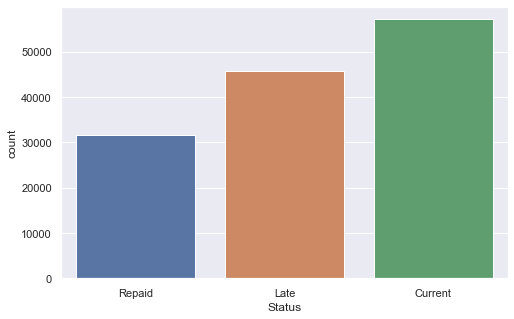

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Status')

<AxesSubplot:xlabel='Restructured', ylabel='count'>

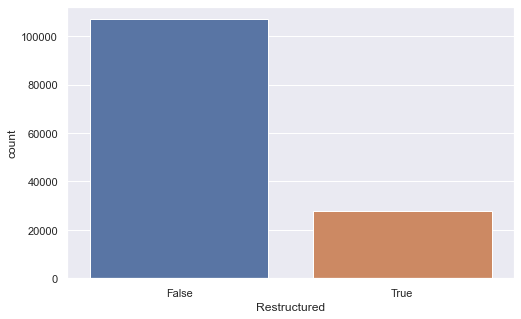

In [126]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Restructured')

<AxesSubplot:xlabel='WorseLateCategory', ylabel='count'>

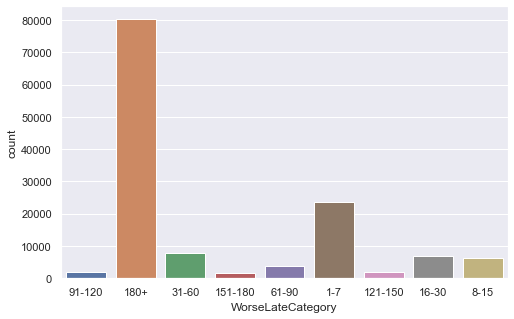

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='WorseLateCategory')

<AxesSubplot:xlabel='CreditScoreEsMicroL', ylabel='count'>

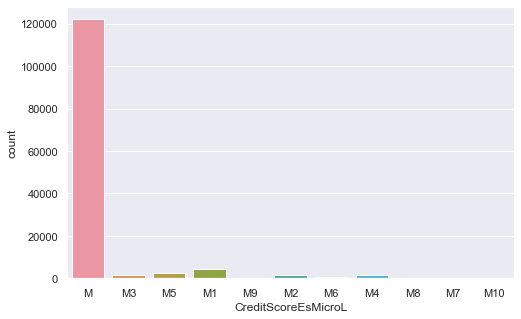

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='CreditScoreEsMicroL')

<AxesSubplot:xlabel='NextPaymentNr', ylabel='count'>

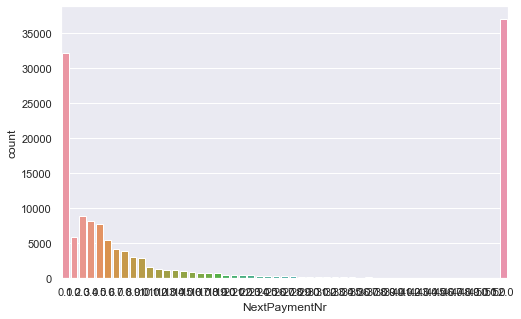

In [129]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='NextPaymentNr')

<AxesSubplot:xlabel='VerificationType', ylabel='count'>

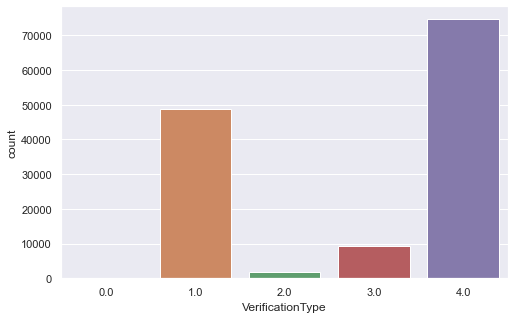

In [130]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='VerificationType')

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

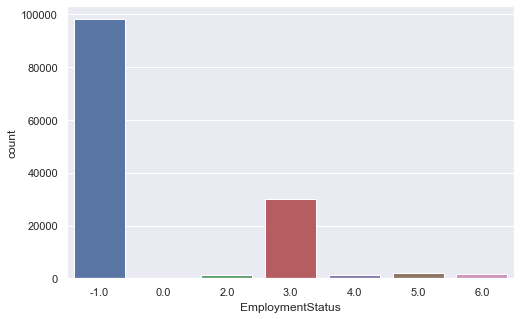

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='EmploymentStatus')

<AxesSubplot:xlabel='Education', ylabel='count'>

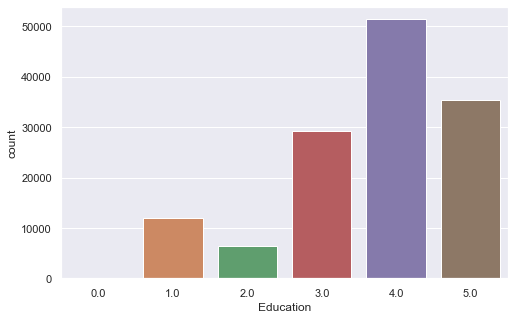

In [132]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Education')

<AxesSubplot:xlabel='NewCreditCustomer', ylabel='count'>

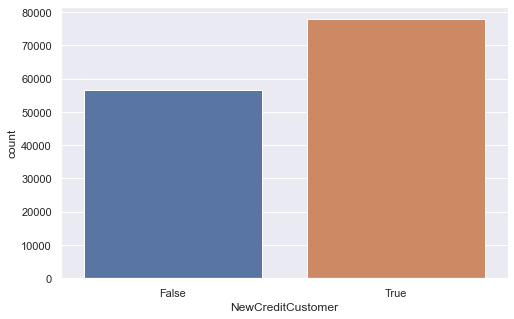

In [133]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='NewCreditCustomer')

<AxesSubplot:xlabel='Gender', ylabel='count'>

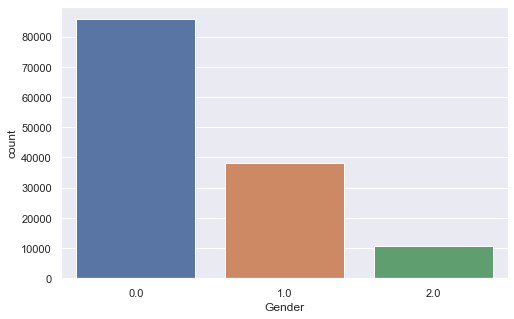

In [134]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Gender')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

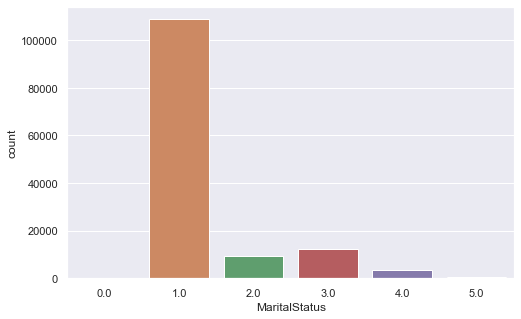

In [135]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='MaritalStatus')

<AxesSubplot:xlabel='OccupationArea', ylabel='count'>

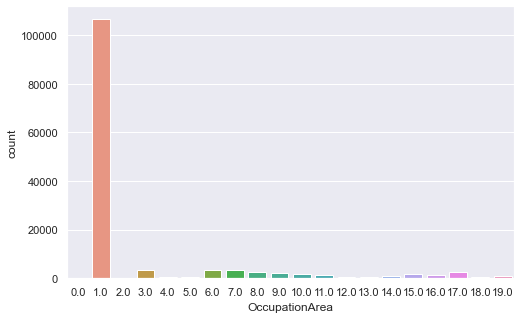

In [136]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='OccupationArea')

<AxesSubplot:xlabel='HomeOwnershipType', ylabel='count'>

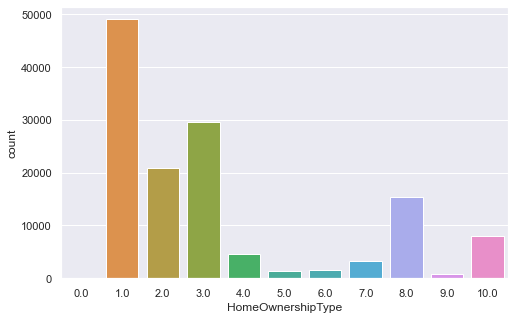

In [137]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='HomeOwnershipType')

<AxesSubplot:xlabel='RecoveryStage', ylabel='count'>

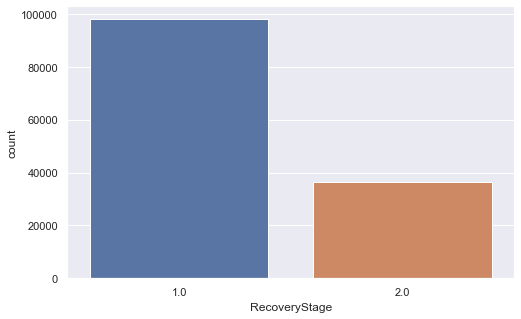

In [138]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='RecoveryStage')

<AxesSubplot:xlabel='ModelVersion', ylabel='count'>

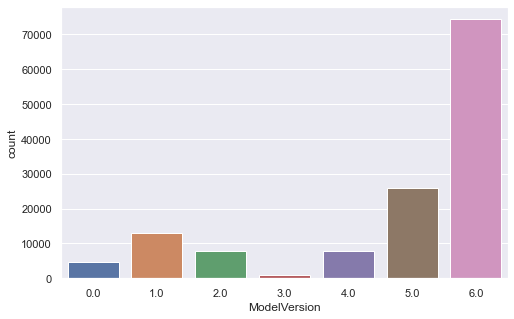

In [139]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='ModelVersion')

<AxesSubplot:xlabel='CreditScoreEeMini', ylabel='count'>

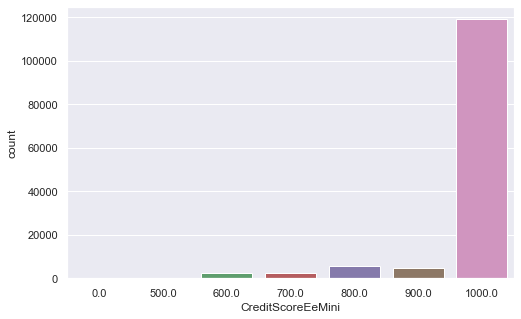

In [140]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='CreditScoreEeMini')

# heat map for multivariate data

In [141]:
plt.figure(figsize=(200,200))
sns.heatmap(data.corr() ,cmap='GnBu', annot=True)
plt.show()
